# Load the cleaned data

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ajmal/network_anomaly_using_hybrid_ml/df_processed_final.csv')
df.head()

,switch,pktcount,bytecount,tot_dur,flows,packetins,byteperflow,Pairflow,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,1,45304,48294064,1.010000e+11,3,1943,14428310,0,143928631,3917,0,0.0,0.0,0
1,1,126395,134737070,2.810000e+11,2,1943,14424046,0,3842,3520,0,0.0,0.0,0
2,1,90333,96294978,2.010000e+11,3,1943,14427244,0,3795,1242,0,0.0,0.0,0
3,1,90333,96294978,2.010000e+11,3,1943,14427244,0,3688,1492,0,0.0,0.0,0
4,1,90333,96294978,2.010000e+11,3,1943,14427244,0,3413,3665,0,0.0,0.0,0


## seperate features into dependent and indepentent


In [ ]:
df.shape

(40220, 14)

In [ ]:
X = df.drop(['label'], axis=1)
y = df['label']
print(X.shape)
print(y.shape)

(40220, 13)
(40220,)


## split dataset into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32176, 13)
(8044, 13)
(32176,)
(8044,)


# model building
## 1. Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

lr_acc = accuracy_score(y_test, y_pred)
lr_cm = confusion_matrix(y_test, y_pred)
lr_cr = classification_report(y_test, y_pred)

print(f'Accuracy \n', lr_acc)
print(f'Confusion Matrix \n', lr_cm)
print(f'Classification Report \n', lr_cr)

Accuracy 
 0.78269517652909
Confusion Matrix 
 [[3217  945]
 [ 803 3079]]
Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.77      0.79      4162
           1       0.77      0.79      0.78      3882

    accuracy                           0.78      8044
   macro avg       0.78      0.78      0.78      8044
weighted avg       0.78      0.78      0.78      8044



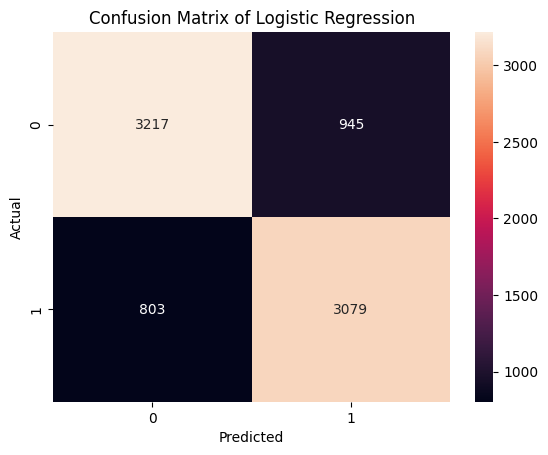

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(lr_cm, annot=True, fmt='d')
plt.title('Confusion Matrix of Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 2. Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)

svc_acc = accuracy_score(y_test, y_pred)
svc_cm = confusion_matrix(y_test, y_pred)
svc_cr = classification_report(y_test, y_pred)

print(f'Accuracy \n', svc_acc)
print(f'Confusion Matrix \n', svc_cm)
print(f'Classification Report \n', svc_cr)

Accuracy 
 0.9531327697662855
Confusion Matrix 
 [[3856  306]
 [  71 3811]]
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95      4162
           1       0.93      0.98      0.95      3882

    accuracy                           0.95      8044
   macro avg       0.95      0.95      0.95      8044
weighted avg       0.95      0.95      0.95      8044



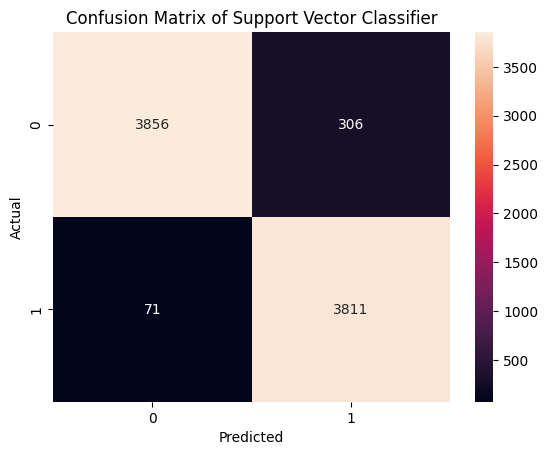

In [ ]:
sns.heatmap(svc_cm, annot=True, fmt='d')
plt.title('Confusion Matrix of Support Vector Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 3. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
y_pred = rfc.predict(X_test_scaled)

rfc_acc = accuracy_score(y_test, y_pred)
rfc_cm = confusion_matrix(y_test, y_pred)
rfc_cr = classification_report(y_test, y_pred)

print(f'Accuracy \n', rfc_acc)
print(f'Confusion Matrix \n', rfc_cm)
print(f'Classification Report \n', rfc_cr)

Accuracy 
 0.9970164097463948
Confusion Matrix 
 [[4143   19]
 [   5 3877]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4162
           1       1.00      1.00      1.00      3882

    accuracy                           1.00      8044
   macro avg       1.00      1.00      1.00      8044
weighted avg       1.00      1.00      1.00      8044



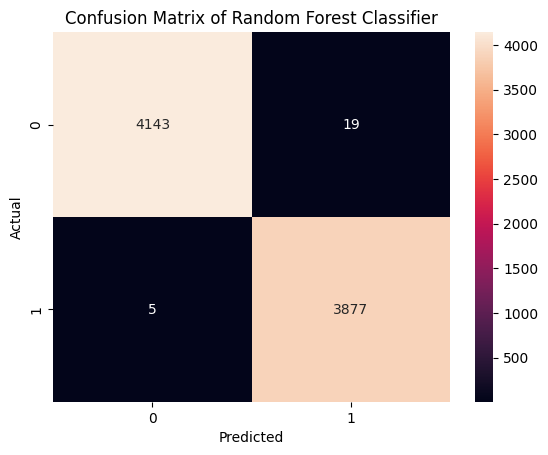

In [ ]:
sns.heatmap(rfc_cm, annot=True, fmt='d')
plt.title('Confusion Matrix of Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 4. XGBOOST  Classifier

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)
y_pred = xgb.predict(X_test_scaled)

xgb_acc = accuracy_score(y_test, y_pred)
xgb_cm = confusion_matrix(y_test, y_pred)
xgb_cr = classification_report(y_test, y_pred)

print(f'Accuracy \n', xgb_acc)
print(f'Confusion Matrix \n', xgb_cm)
print(f'Classification Report \n', xgb_cr)

Accuracy 
 0.9982595723520636
Confusion Matrix 
 [[4150   12]
 [   2 3880]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4162
           1       1.00      1.00      1.00      3882

    accuracy                           1.00      8044
   macro avg       1.00      1.00      1.00      8044
weighted avg       1.00      1.00      1.00      8044



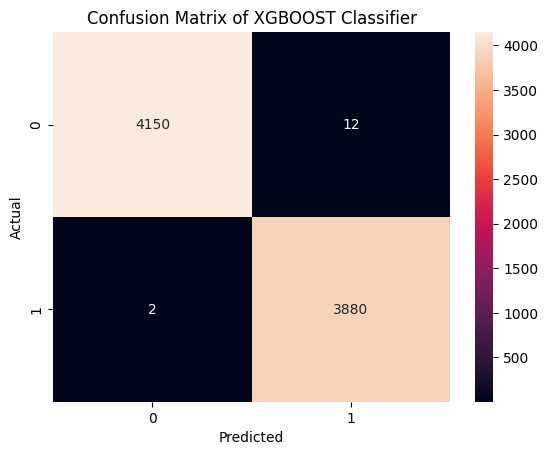

In [ ]:
sns.heatmap(xgb_cm, annot=True, fmt='d')
plt.title('Confusion Matrix of XGBOOST Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

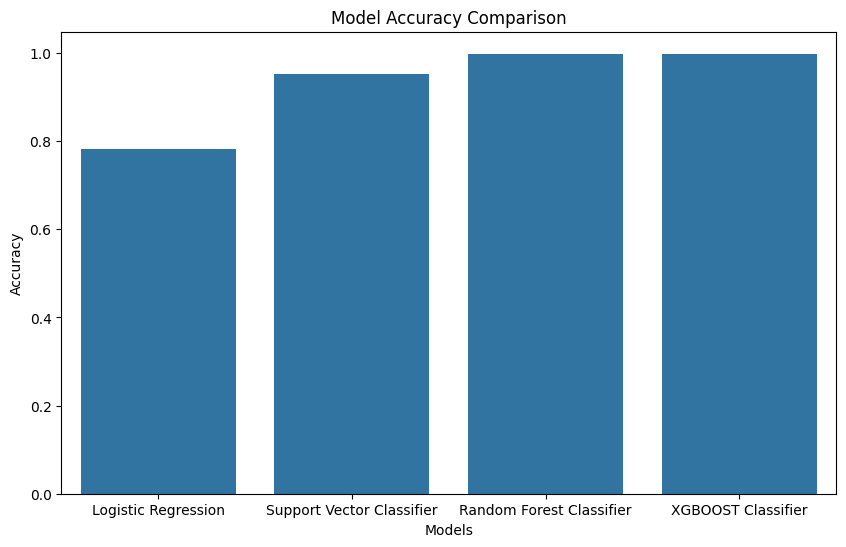

In [ ]:
models = ['Logistic Regression', 'Support Vector Classifier', 'Random Forest Classifier', 'XGBOOST Classifier']
accuracy = [lr_acc, svc_acc, rfc_acc, xgb_acc]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracy)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()


# save the models

In [ ]:
import pickle

model_path = '/content/drive/MyDrive/ajmal/network_anomaly_using_hybrid_ml/saved_models/'

def save_model(model, model_name):
  model_path_full = model_path + model_name
  return pickle.dump(model, open(model_path_full, "wb"))

In [ ]:
# save standard scaler
path = '/content/drive/MyDrive/ajmal/network_anomaly_using_hybrid_ml/saved_models/fitted_sc.pkl'
with open(path, 'wb') as file:
    pickle.dump(sc, file)


In [ ]:
model_name = 'LR_model.sav'
save_model(lr, model_name)

In [ ]:
model_name = 'SVC_model.sav'
save_model(svc, model_name)

In [ ]:
model_name = 'RFC_model.sav'
save_model(rfc, model_name)

In [ ]:
model_name = 'XGB_model.sav'
save_model(xgb, model_name)

## load saved model

In [ ]:
# load fitted standard
loaded_sc = pickle.load(open('/content/drive/MyDrive/ajmal/network_anomaly_using_hybrid_ml/saved_models/fitted_sc.pkl', 'rb'))
loaded_sc

StandardScaler()

In [ ]:
loaded_model = pickle.load(open('/content/drive/MyDrive/ajmal/network_anomaly_using_hybrid_ml/saved_models/XGB_model.sav', 'rb'))
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

- first test

In [ ]:
X_test.iloc[0]

switch         1.000000e+00
pktcount       1.073620e+05
bytecount      6.226996e+06
tot_dur        3.900000e+11
flows          3.000000e+00
packetins      1.654000e+04
byteperflow    4.437580e+05
Pairflow       1.000000e+00
tx_bytes       3.051479e+08
rx_bytes       2.657829e+07
tx_kbps        1.100000e+02
rx_kbps        1.190000e+02
tot_kbps       2.290000e+02
Name: 32575, dtype: float64

In [ ]:
y_test.iloc[0]

1

In [ ]:
input = X_test.iloc[0]
input = loaded_sc.transform(input.values.reshape(1, -1))
predicted_value = loaded_model.predict(input)
print(predicted_value[0])

1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


- second test

In [ ]:
X_test.iloc[1]

switch         2.000000e+00
pktcount       2.060000e+02
bytecount      2.018800e+04
tot_dur        2.110000e+11
flows          7.000000e+00
packetins      3.421000e+03
byteperflow    2.842000e+03
Pairflow       0.000000e+00
tx_bytes       5.310000e+03
rx_bytes       3.420017e+07
tx_kbps        0.000000e+00
rx_kbps        2.529000e+03
tot_kbps       2.529000e+03
Name: 38045, dtype: float64

In [ ]:
y_test.iloc[1]

0

In [ ]:
input = X_test.iloc[1]
input = loaded_sc.transform(input.values.reshape(1, -1))
predicted_value = loaded_model.predict(input)
print(predicted_value[0])

0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
